In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
import numpy as np

if not os.path.isfile('car_price.csv'):
    !wget -O 'car_price.csv' "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv"

In [2]:
columns = ["Make", "Model", "Year", "Engine HP", "Engine Cylinders", "Transmission Type", "Vehicle Style", "highway MPG", "city mpg", "MSRP"]

In [3]:
df = pd.read_csv("car_price.csv")
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
df = df[columns].copy()
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [6]:
df['above_average'] = (df.msrp >= df.msrp.mean()).astype(int)
del df['msrp']
df['above_average'].value_counts()

0    8645
1    3269
Name: above_average, dtype: int64

In [7]:
columns = list(df.columns)

In [8]:
numerical = list(df.dtypes[df.dtypes != 'object'].index)
numerical.remove('above_average')
categorical = list(df.dtypes[df.dtypes == 'object'].index)

In [9]:
numerical

['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']

In [10]:
df = df.fillna(0)
df.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
above_average        0
dtype: int64

## split data

In [11]:
df_full_train, df_test = train_test_split(df, test_size=0.2)
df_train, df_val = train_test_split(df_full_train, test_size=0.25)
df_full_train.shape, df_train.shape, df_val.shape, df_test.shape

y_train = df_train.above_average
y_val = df_val.above_average
y_test = df_test.above_average

del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

## Question 1: ROC AUC feature importance
which hs the highest auc: *engine_hp*

In [12]:
for col in numerical:
    auc_score = roc_auc_score(y_train, df_train[col])
    if auc_score < 0.5:
        auc_score = roc_auc_score(y_train, -df_train[col])
    print("%16s: %.6f" % (col, auc_score))

            year: 0.685403
       engine_hp: 0.916635
engine_cylinders: 0.766685
     highway_mpg: 0.630896
        city_mpg: 0.670691


## Training the model

In [13]:
df_train

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg
4661,Ford,Festiva,1991,63.0,4.0,MANUAL,2dr Hatchback,38,30
7305,Honda,Odyssey,2016,248.0,6.0,AUTOMATIC,Passenger Minivan,28,19
638,BMW,6 Series Gran Coupe,2016,445.0,8.0,AUTOMATIC,Sedan,24,15
4944,Nissan,Frontier,2015,261.0,6.0,AUTOMATIC,Crew Cab Pickup,21,15
6017,Volkswagen,Jetta GLI,2013,210.0,4.0,AUTOMATED_MANUAL,Sedan,32,24
...,...,...,...,...,...,...,...,...,...
711,Mazda,6,2016,184.0,4.0,AUTOMATIC,Sedan,38,26
10711,Ford,Transit Wagon,2016,275.0,6.0,AUTOMATIC,Passenger Van,19,14
6335,Mitsubishi,Lancer,2016,148.0,4.0,AUTOMATIC,Sedan,35,27
1575,Chevrolet,Avalanche,2011,320.0,8.0,AUTOMATIC,Crew Cab Pickup,21,15


In [14]:
dv = DictVectorizer(sparse=False)
train_dicts = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict_proba(X_val)[:, 1]
y_pred

array([0.14389652, 0.0073469 , 0.9164573 , ..., 0.00153445, 0.37898641,
       0.99973429])

## whatts the auc
0.978

In [15]:
round(roc_auc_score(y_val, y_pred),3)

0.974

## Question 3: Precision and Recall
Now let's compute precision and recall for our model.

Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
For each threshold, compute precision and recall
Plot them
At which threshold precision and recall curves intersect?

1. 0.28
1. 0.48
1. 0.68
1. 0.88

0.48

In [18]:
def tpr_fpr_pr_dataframe(y_val, y_pred):
    threshold = np.linspace(0,1,101)
    scores = []
    for t in threshold:
        actual_postive = y_val == 1
        actual_negative = y_val == 0


        predicted_positive = y_pred >= t
        predicted_negative = y_pred < t

        tn = (predicted_negative & actual_negative).sum()
        tp = (predicted_positive & actual_postive).sum()
        fn = (predicted_negative & actual_postive).sum()
        fp = (predicted_positive & actual_negative).sum()

        fpr = fp / (tn + fp)
        tpr = tp / (tp + fn)
        
        precision = tp / (fp + tp)
        recall = tp / (tp + fn)

        scores.append((t, tn, tp, fn, fp, fpr, tpr, precision, recall))

    df_roc = pd.DataFrame(scores, columns=['threshold', 'tn', 'tp', 'fn', 'fp', 'fpr', 'tpr', 'p', 'r'])
    return df_roc

df_roc = tpr_fpr_pr_dataframe(y_val, y_pred)
df_roc[::10]

/tmp/ipykernel_27667/345406727.py:20: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp / (fp + tp)


,threshold,tn,tp,fn,fp,fpr,tpr,p,r
0,0.0,0,638,0,1745,1.000000,1.000000,0.267730,1.000000
10,0.1,1384,627,11,361,0.206877,0.982759,0.634615,0.982759
20,0.2,1536,606,32,209,0.119771,0.949843,0.743558,0.949843
30,0.3,1604,584,54,141,0.080802,0.915361,0.805517,0.915361
40,0.4,1642,566,72,103,0.059026,0.887147,0.846039,0.887147
50,0.5,1657,538,100,88,0.050430,0.843260,0.859425,0.843260
60,0.6,1683,505,133,62,0.035530,0.791536,0.890653,0.791536
70,0.7,1711,470,168,34,0.019484,0.736677,0.932540,0.736677
80,0.8,1730,417,221,15,0.008596,0.653605,0.965278,0.653605
90,0.9,1739,325,313,6,0.003438,0.509404,0.981873,0.509404


In [22]:
df_roc[df_roc.p == df_roc.r].threshold

47    0.47
Name: threshold, dtype: float64

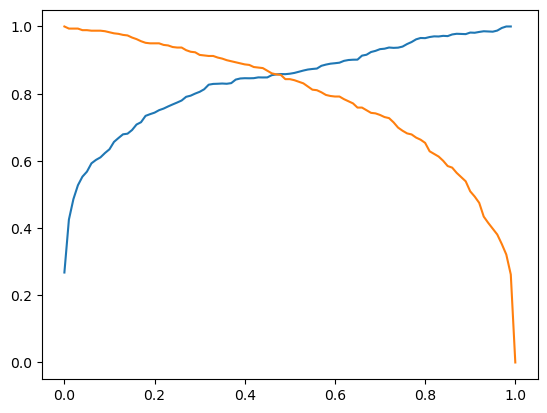

In [20]:
import matplotlib.pyplot as plt

plt.plot(df_roc.threshold, df_roc.p)
plt.plot(df_roc.threshold, df_roc.r)

In [ ]:
for 